# Importação de Bibliotecas

In [1]:
#Instala as bibliotecas
'''
!pip install sklearn
!pip install seaborn
!pip install numpy
!pip install matplotlib
''';

In [2]:
#importando bibliotecas
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carga de Dados

In [3]:
#Carregando as variaveis tratadas no pré processamento
with open('../../../01-Análise Exploratória/Pré-Processamento/Credit Risk/base/credit.pkl', 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

# Treina Árvore de Decisão

In [4]:
#Treinando o modelo
tree_decision = DecisionTreeClassifier(criterion='entropy', random_state= 0)
tree_decision.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [5]:
#Atributos com maior relevancia --> renda, valor-empréstimo e idade respectivamente
tree_decision.feature_importances_

array([0.22310382, 0.46908662, 0.30780957])

In [6]:
#Grafico da Arvore de Decisão
'''
previsores = ['idade', 'renda', 'emprestimo_mnt']

figure, axes = plt.subplots(nrows=1,ncols=1, figsize=(10,10))
tree.plot_tree(tree_decision, feature_names=previsores, class_names = ['Paga', 'Não Paga'],filled=True);
''';

In [7]:
# Previsões da x_test
previsoes = tree_decision.predict(x_test)

In [8]:
#Acurácia do modelo
accuracy_score(y_test, previsoes)

0.8158661961025011

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      5179
         1.0       0.55      0.55      0.55      1338

    accuracy                           0.82      6517
   macro avg       0.72      0.72      0.72      6517
weighted avg       0.82      0.82      0.82      6517



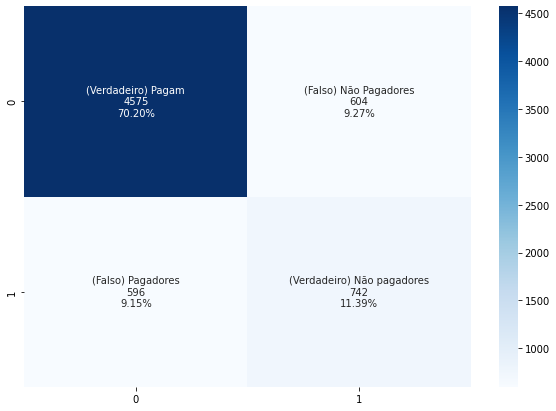

In [9]:
#Resultado da Classificação



print(classification_report(y_test, previsoes))
cf_matrix = confusion_matrix(y_test, previsoes)

plt.figure(figsize = (10,7))

group_names = ['(Verdadeiro) Pagam','(Falso) Não Pagadores','(Falso) Pagadores','(Verdadeiro) Não pagadores']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns_plot = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.savefig('img/confusion_matrix.png', dpi=300)